In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
import os
os.listdir('/content')

['.config', 'fear_greed_index.csv', 'historical_data.csv', 'sample_data']

In [3]:
sentiment = pd.read_csv('/content/fear_greed_index.csv')
trades = pd.read_csv('/content/historical_data.csv')

sentiment.head()
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
trades.columns = trades.columns.str.replace(" ", "_")

In [5]:
trades.columns

Index(['Account', 'Coin', 'Execution_Price', 'Size_Tokens', 'Size_USD', 'Side',
       'Timestamp_IST', 'Start_Position', 'Direction', 'Closed_PnL',
       'Transaction_Hash', 'Order_ID', 'Crossed', 'Fee', 'Trade_ID',
       'Timestamp'],
      dtype='object')

In [6]:
trades['Timestamp_IST'] = pd.to_datetime(
    trades['Timestamp_IST'],
    dayfirst=True
)

trades['Date'] = trades['Timestamp_IST'].dt.date

In [7]:
trades[['Timestamp_IST','Date']].head()

,Timestamp_IST,Date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [8]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [9]:
# convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# check
sentiment[['date','classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [10]:
merged = pd.merge(
    trades,
    sentiment,
    left_on='Date',
    right_on='date',
    how='inner'
)

# Check result
merged.shape

(211218, 21)

In [11]:
merged['Closed_PnL'].describe()

,Closed_PnL
count,211218.000000
mean,48.549304
std,917.989791
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.790132
max,135329.090100


In [12]:
merged['win'] = merged['Closed_PnL'] > 0

# check distribution
merged['win'].value_counts()

,count
win,
False,124355
True,86863


In [13]:
merged.groupby('classification')['Closed_PnL'].mean().sort_values(ascending=False)

,Closed_PnL
classification,
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Extreme Fear,34.537862
Neutral,34.307718


In [14]:
merged.groupby('classification')['Closed_PnL'].median().sort_values(ascending=False)

,Closed_PnL
classification,
Extreme Fear,0.0
Extreme Greed,0.0
Fear,0.0
Greed,0.0
Neutral,0.0


In [15]:
win_rate = merged.groupby('classification')['win'].mean() * 100
win_rate.sort_values(ascending=False)

,win
classification,
Extreme Greed,46.494299
Fear,42.076750
Neutral,39.699093
Greed,38.482794
Extreme Fear,37.060748


In [16]:
merged.groupby('classification')['Size_USD'].mean().sort_values(ascending=False)

,Size_USD
classification,
Fear,7816.109931
Greed,5736.884375
Extreme Fear,5349.731843
Neutral,4782.732661
Extreme Greed,3112.251565


In [17]:
merged['classification'].value_counts()

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [18]:
merged.groupby('classification')['Closed_PnL'].std().sort_values(ascending=False)


,Closed_PnL
classification,
Extreme Fear,1136.056091
Greed,1116.028390
Fear,935.355438
Extreme Greed,766.828294
Neutral,517.122220


In [19]:
median_size = merged['Size_USD'].median()

merged['size_segment'] = merged['Size_USD'].apply(
    lambda x: 'Large Trade' if x > median_size else 'Small Trade'
)

merged.groupby('size_segment')['win'].mean() * 100

,win
size_segment,
Large Trade,41.533232
Small Trade,40.716403


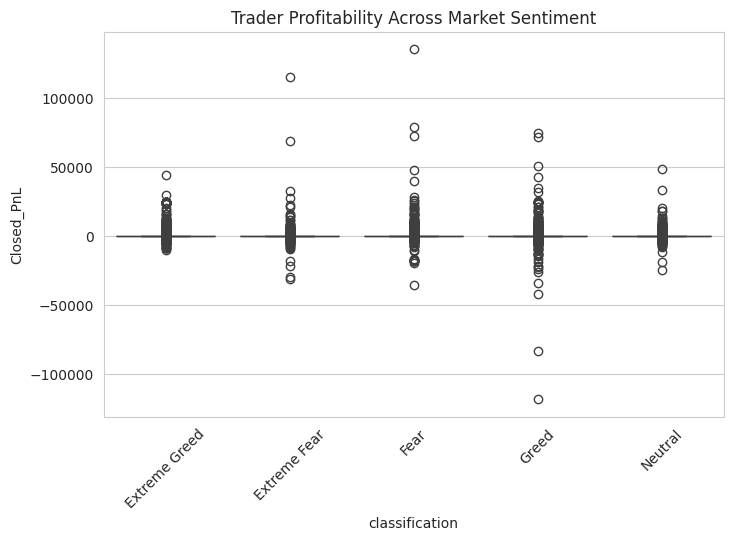

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed_PnL', data=merged)

plt.title("Trader Profitability Across Market Sentiment")
plt.xticks(rotation=45)

plt.show()

In [21]:
summary = merged.groupby('classification').agg({
    'Closed_PnL': ['mean', 'std'],
    'win': 'mean'
})

summary

Closed_PnL                    win
                     mean          std      mean
classification                                  
Extreme Fear    34.537862  1136.056091  0.370607
Extreme Greed   67.892861   766.828294  0.464943
Fear            54.290400   935.355438  0.420768
Greed           42.743559  1116.028390  0.384828
Neutral         34.307718   517.122220  0.396991

In [22]:
final_summary = merged.groupby('classification').agg(
    Avg_PnL=('Closed_PnL', 'mean'),
    Volatility=('Closed_PnL', 'std'),
    Win_Rate=('win', 'mean'),
    Avg_Position_Size=('Size_USD', 'mean')
)

final_summary['Win_Rate'] = final_summary['Win_Rate'] * 100

final_summary

,Avg_PnL,Volatility,Win_Rate,Avg_Position_Size
classification,,,,
Extreme Fear,34.537862,1136.056091,37.060748,5349.731843
Extreme Greed,67.892861,766.828294,46.494299,3112.251565
Fear,54.290400,935.355438,42.076750,7816.109931
Greed,42.743559,1116.028390,38.482794,5736.884375
Neutral,34.307718,517.122220,39.699093,4782.732661


In [23]:
final_summary.round(2)

,Avg_PnL,Volatility,Win_Rate,Avg_Position_Size
classification,,,,
Extreme Fear,34.54,1136.06,37.06,5349.73
Extreme Greed,67.89,766.83,46.49,3112.25
Fear,54.29,935.36,42.08,7816.11
Greed,42.74,1116.03,38.48,5736.88
Neutral,34.31,517.12,39.70,4782.73


## Key Insights

Insight 1 – Market Sentiment Influences Profitability

Trader performance varies significantly across sentiment regimes. Extreme Greed periods show the highest average profitability and win rates, while Extreme Fear is associated with lower win rates and higher volatility. This suggests that bullish market sentiment may create more favorable trading conditions.

Insight 2 – Traders Exhibit Higher Risk-Taking During Fear Periods

The analysis shows that average position sizes are largest during Fear phases, indicating increased capital exposure despite uncertain market conditions. However, win rates during these periods remain lower than in Greed regimes, suggesting that traders may be taking on additional risk without proportional improvements in success rates.

Insight 3 – Profitability is Driven by a Small Number of Large Trades

The distribution of Closed PnL reveals significant outliers on both the profit and loss sides, while the median PnL remains close to zero across sentiment categories. This indicates that overall trader profitability is heavily influenced by a relatively small subset of large trades, highlighting the importance of risk management and position sizing in trading performance.

## Strategy Recommendations

Strategy Recommendation 1 – Align Trading Exposure with Bullish Sentiment

Since Extreme Greed periods demonstrate higher win rates and stronger average profitability with comparatively lower volatility, traders may benefit from increasing participation during such regimes. Allocating more capital when market sentiment is strongly positive could improve risk-adjusted returns.

Strategy Recommendation 2 – Reduce Position Sizes in Fear-Driven Markets

Fear and Extreme Fear conditions are associated with higher volatility and lower win rates. Traders should consider reducing position sizes and limiting leverage during these periods to protect capital and minimize drawdowns.

Strategy Recommendation 3 – Prioritize Risk Management Over Trade Frequency

Given that overall profitability is driven by a small number of large trades, implementing disciplined stop-loss strategies and structured position sizing can help traders capture outsized gains while preventing significant losses.

## Conclusion

This analysis demonstrates that market sentiment plays a meaningful role in shaping trader behavior and performance. Bullish regimes, particularly Extreme Greed, are associated with higher win rates and stronger profitability, whereas fear-driven markets exhibit greater volatility and lower consistency.

Additionally, the findings suggest that trader profitability is largely influenced by a small number of high-impact trades, reinforcing the importance of disciplined risk management and position sizing.

These insights can support the development of sentiment-aware trading strategies aimed at improving risk-adjusted returns.